In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#read the data
houses= pd.read_csv('train.csv') 

In [58]:
#see the data
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#finding corelations of features with SalePrice
corr = houses.corr()['SalePrice']
corr[np.argsort(corr, axis = 0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

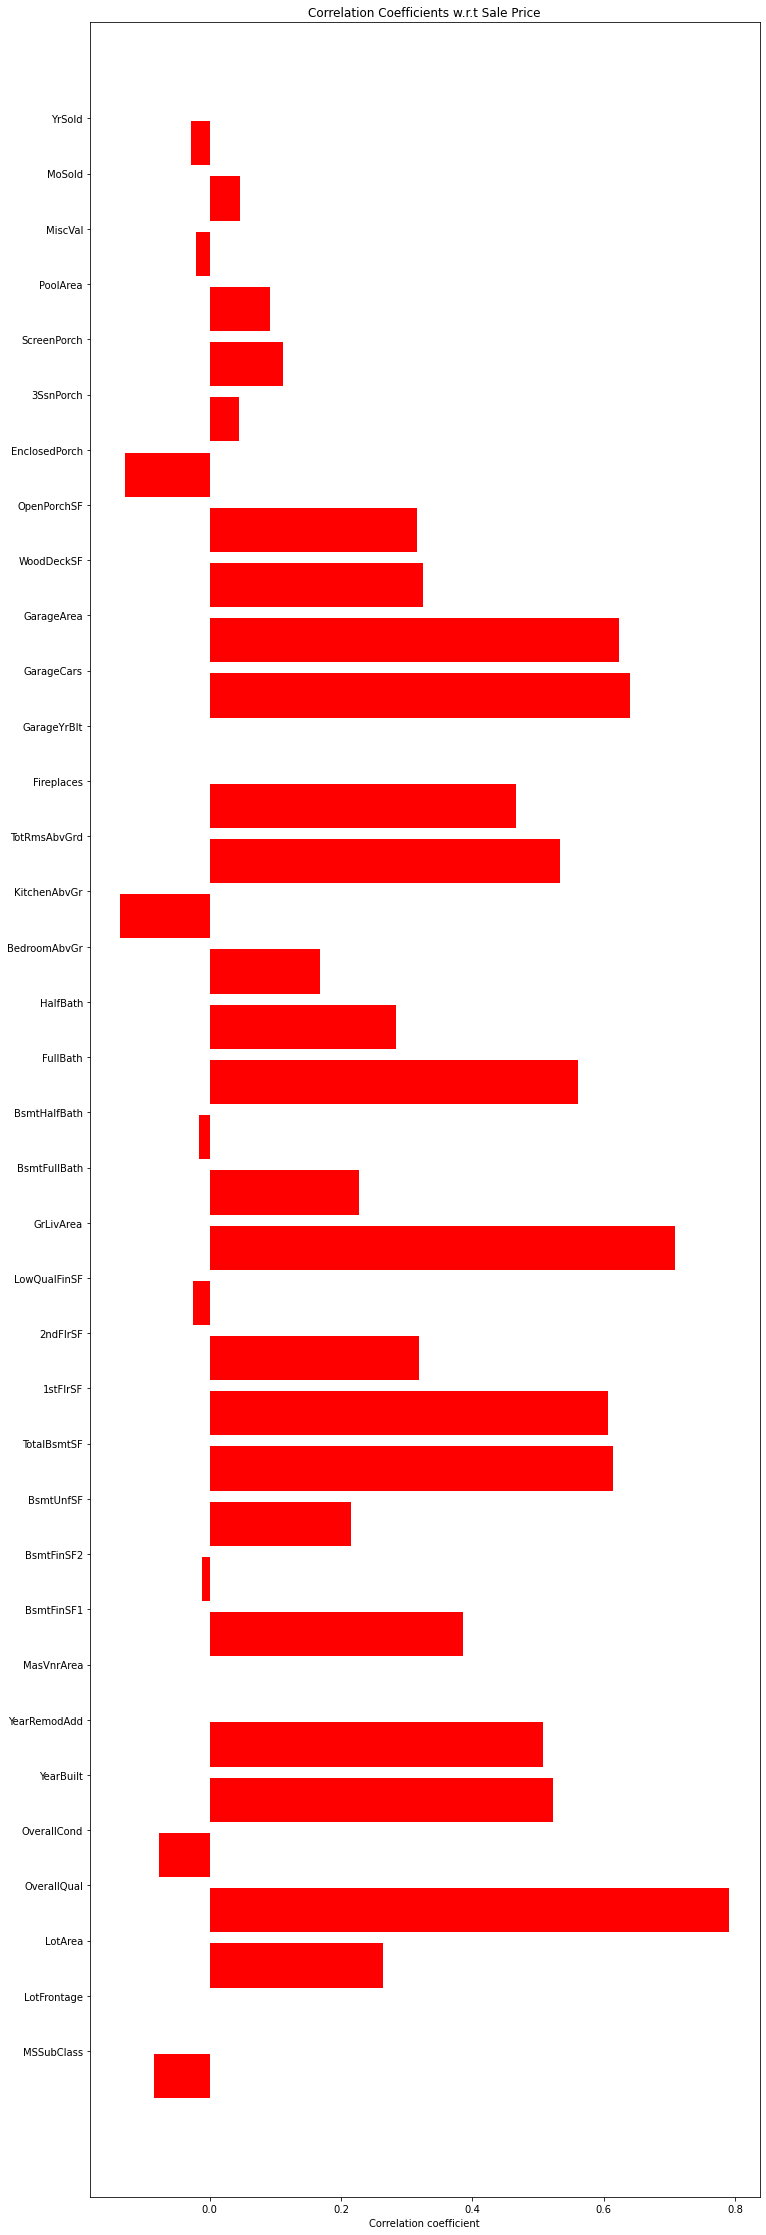

In [5]:
#plotting correlations
num_feat=houses.columns[houses.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [6]:
#detecting correlations between two feature which have correlation score above 0.5 

correlations=houses.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key])
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
17,"(GarageArea, GarageCars)",0.882475
26,"(GarageYrBlt, YearBuilt)",0.825667
11,"(GrLivArea, TotRmsAbvGrd)",0.825489
27,"(1stFlrSF, TotalBsmtSF)",0.819530
4,"(2ndFlrSF, GrLivArea)",0.687501
6,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
12,"(BsmtFinSF1, BsmtFullBath)",0.649212
1,"(GarageYrBlt, YearRemodAdd)",0.642277
16,"(FullBath, GrLivArea)",0.630012
18,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


In [7]:
#see the corelations of OverallQual and SalePrice
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [8]:
#see the corelations of TotRmsAbvGrd and SalePrice
houses[['TotRmsAbvGrd','SalePrice']].groupby(['TotRmsAbvGrd'],
as_index=False).mean().sort_values(by='TotRmsAbvGrd', ascending=False)

,TotRmsAbvGrd,SalePrice
11,14,200000.000000
10,12,280971.454545
9,11,318022.000000
8,10,296279.170213
7,9,252988.173333
6,8,213427.529412
5,7,196666.784195
4,6,161303.296020
3,5,141550.749091
2,4,122844.628866


In [9]:
#see the corelations of GarageCars and SalePrice
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


Text(0.5, 6.79999999999999, 'Sale Price')

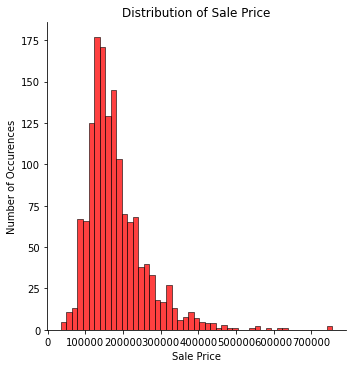

In [10]:
#plot of the sale numbers due to price
sns.displot(houses['SalePrice'], color="r")
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

In [11]:
#lets see if there are any columns with missing values 
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

The features have NaNs does not have a correlation score above 0.5

In [14]:
#import packages for XGBoost model
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [15]:
#read the test data
houses_test = pd.read_csv('test.csv')

In [130]:
#prepare the data for training and testing


x_train = houses[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
                'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
y_train = houses[['SalePrice']]

x_test = houses_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
                'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]


In [131]:
#see the NaNs of test data
x_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
GarageArea      1
TotalBsmtSF     1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [99]:
#get rid of the NaNs for test data
x_test['GarageCars'].fillna(x_test['GarageCars'].mean(), inplace = True)
x_test['GarageArea'].fillna(x_test['GarageArea'].mean(), inplace = True)
x_test['TotalBsmtSF'].fillna(x_test['TotalBsmtSF'].mean(), inplace = True)
x_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [100]:
#creation of XGBoost model 

model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                            max_depth = 7, alpha = 5)

In [108]:
#fit the model and get prediction of model

model_xgb.fit(x_train, y_train)
preds_xgb = model_xgb.predict(x_test)


In [109]:
#see the predictions

preds_xgb

array([123640.016, 150821.56 , 169417.69 , ..., 148256.64 , 111528.22 ,
       248779.56 ], dtype=float32)

In [104]:
#import packages for Support Vector Machine model

from sklearn.svm import SVR

In [113]:
#creation of SVM model

model_svm = SVR(kernel = 'sigmoid')

In [114]:
#fit the SVM model

model_svm.fit(x_train, y_train.values.ravel())

SVR(kernel='sigmoid')

In [118]:
#get and see the prediction of the SVM model

preds_svm=model_svm.predict(x_test)
preds_svm


array([163001.24064544, 162999.45937396, 162999.86011477, ...,
       162999.60119209, 163000.11495798, 162998.9156709 ])

In [120]:
#import packages for Random Forest model

from sklearn.ensemble import RandomForestRegressor as rfg

In [121]:
#creation of model for Random Forest model

model_rfg = rfg(n_estimators = 1000, random_state = 20 )

In [124]:
#fit the model and get predictions

model_rfg.fit(x_train, y_train.values.ravel())
preds_rfg = model_rfg.predict(x_test)

In [129]:
#see the predictions
preds_rfg

array([123318.668, 147547.44 , 169715.2  , ..., 148061.833, 107447.05 ,
       234507.158])